# User Churn Prediction in Telecommunication Industry

In this project, we will analyze the underlying structure of documents automatically and visualize the clustering result natural language methods/tools.

The dataset used in this project is from Amazon product reviews data.

Scope:

- Text Processing
    - Tokenizing
    - Stemming

- Feature Engineering
    - Term Frequency-Inverse Doucment Frequency(TF-IDF)

- Model Training
    - K-means clustering
    - Latent Dirichlet Allocation(LDA)


#### question: 

1.don't know how to setup the google drive things

2.don't know how to deal with the categorical feature

3.Under What kinds of situation we need to do normalization or standarization

4.What is grid search

# Part 0: Setup Google Drive Environment

In [2]:
# import data from existing file (another way is to import data from google drive through drive api)
import pandas as pd

df1 = pd.read_csv('churn.all')
df1.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Part 1: Data Exploration

In [35]:
# filter the 'ignore' warning
import warnings
warnings.filterwarnings('ignore')

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn import model_selection

### 1.1 Data Exploration Analysis

In [3]:
# import data
churn_df = pd.read_csv('churn.all')
churn_df.head(3)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [4]:
churn_df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
churn_df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                           object
dtype: object

### 1.2 Data Cleaning

In [6]:
# check categorical feature
# We've found categorical features including intl_plan, voice_mail_plan, churned
print(churn_df['intl_plan'][0])
print(churn_df['churned'][0])
print(churn_df['voice_mail_plan'][0])

 no
 False.
 yes


In [7]:
# remove the whitespace in the string
churn_df['intl_plan'] = churn_df['intl_plan'].apply(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].apply(lambda x: x.strip()[:-1])
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].apply(lambda x: x.strip())

In [8]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 1.3: Understand the features

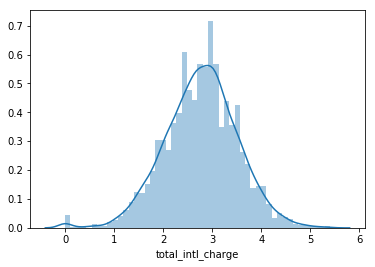

In [9]:
%matplotlib inline
sns.distplot(churn_df['total_intl_charge'])

In [10]:
# correlations between all the features
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

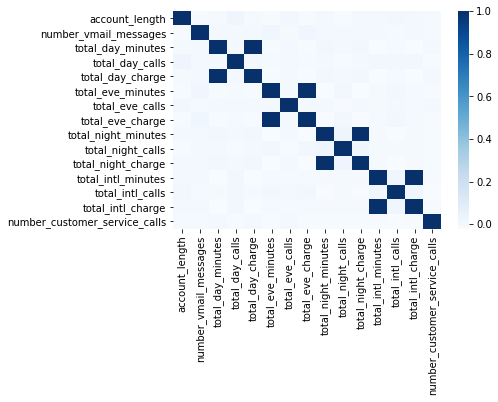

In [11]:
#  correlations between all the features
corr = churn_df[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']].corr()
# show heatmap
sns.heatmap(corr, cmap = 'Blues')

In [12]:
# actual number of the correlations
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655,-0.008533
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.026949,0.000391,-0.000156,0.000368,-0.008283


# Part 2: Feature Preprocessing

In [13]:
# calculate two featuers correlation
# pearsonr will output pearson correlation and p-value for non-correlation
print (pearsonr(churn_df['total_day_minutes'], churn_df['number_vmail_messages'])[0])

0.005381375960654535


In [14]:
# Get ground truth data
y = np.where(churn_df['churned'] =='True',1,0)
# Drop some useless columns
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop,axis = 1)

# yes and no have to be converted to boolean values
yes_no_cols = ['intl_plan','voice_mail_plan']
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'#(why it can be converted to boolean?)


X = churn_feat_space

In [15]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[14.14]


In [16]:
to_drop_hw1 = ['area_code','phone_number','churned']
churn_feat_space_hw1 = churn_df.drop(to_drop_hw1, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space_hw1[yes_no_cols] = churn_feat_space_hw1[yes_no_cols] == 'yes'

# sklearn.preprocessing.OneHotEncoder
churn_feat_space_hw1 = pd.get_dummies(churn_feat_space_hw1, columns=['state'])

churn_feat_space_hw1.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


# Part 3: Model Training and Result Evaluation

### 3.1 Split dataset

In [17]:
# split dataset into training and testing data
# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2)
print('Training dataset has %d observation with %d features' % X_train.shape)
print('Testing dataset has %d observations with %d features' % X_test.shape)

Training dataset has 4000 observation with 17 features
Testing dataset has 1000 observations with 17 features


In [18]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max - x_min)
# 1.speed up gradient descent
# 2.same scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


### 3.2 Model Training and Selectoin

In this section, we will adopt randomforest, kneighbor, logistic regression and svm to fit 
this dataset. Through cross validation, we will decide which is the best model.

In [19]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# SVM
classifier_SVC = SVC()

In [20]:
# Train the model
classifier_logistic.fit(X_train, y_train)
classifier_KNN.fit(X_train, y_train)
classifier_RF.fit(X_train, y_train)
classifier_SVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
classifier_RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
classifier_logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
classifier_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
print(classifier_logistic.score(X_test,y_test))
print(classifier_KNN.score(X_test,y_test))
print(classifier_RF.score(X_test,y_test))
print(classifier_SVC.score(X_test,y_test))

0.865
0.887
0.944
0.92


In [25]:
# Use 5-fole cross validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest','SVM']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_SVC]
for (classifier, model) in zip(model_list,model_names):
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train,cv = 5)
    print(model,":")
    print(cv_score)
    print(model," Model Accuracy is:",cv_score.mean())


Logistic Regression :
[0.85268414 0.86891386 0.8675     0.86858573 0.86858573]
Logistic Regression  Model Accuracy is: 0.8652538933654584
KNN :
[0.90012484 0.90387016 0.88375    0.8873592  0.90362954]
KNN  Model Accuracy is: 0.8957467484324194
Random Forest :
[0.9525593  0.95505618 0.94       0.94993742 0.95244055]
Random Forest  Model Accuracy is: 0.9499986906229541
SVM :
[0.92759051 0.917603   0.9175     0.92866083 0.93742178]
SVM  Model Accuracy is: 0.9257552222737848


### 3.3 Use Grid Search to Find Optimal hyperparameters

In [26]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
    print('Best score: %0.3f' % gs.best_score_)
    print('Best parameters set')
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

#### 3.3.1 Find optimal hyperparameters - LogisticRegression

In [27]:
# Possible hyperparmater options for Logistic Regression Regularization
# Penalty is choosed form L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('11',1) ('11',5),('11',10)('12',1)('12',5),('12',10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}

Grid_LR = GridSearchCV(LogisticRegression(),parameters,cv=5)
Grid_LR.fit(X_train,y_train)
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.866
Best parameters set
	C: 1
	penalty: 'l1'


In [28]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### 3.3.2 Find optimal hyperparameters - KNN

In [29]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.897
Best parameters set
	n_neighbors: 7


In [30]:
best_KNN_model = Grid_KNN.best_estimator_

#### 3.3.3 Find optimal hyperparameters - Random Forest


In [31]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.957
Best parameters set
	n_estimators: 60


In [32]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

### 3.4 Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn,fp],[]]
def cal_evaluation(classifier,cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tp+tn)/(tp+fp+fn+tp+0.0)
    precision = tp/(tp+fp+0.0)
    recall = tp/(tp+fn+0.0)
    print(classifier)
    print('Accuracy is: %0.3f' % accuracy)
    print('Precision is: %0.3f' % precision)
    print('Recall is: %0.3f' % recall)
    
# print out confusion matrices
def draw_confusion_matrices(confusion_matrices):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0],cm[1]
        cal_evaluation(classifier,cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm , interpolation = 'nearest', cmap = plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels(['']+class_names)
        ax.set_yticklabels(['']+class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()


Random Forest
Accuracy is: 3.604
Precision is: 0.948
Recall is: 0.738


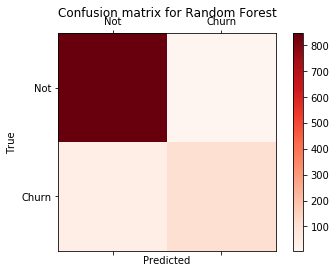

Logistic Regression
Accuracy is: 3.604
Precision is: 0.948
Recall is: 0.738


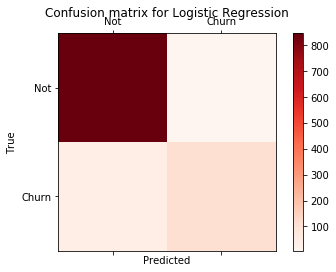

In [36]:
%matplotlib inline

# Confusion Matrix, accuracy, precision and recall for random forest and logistic regression
confusion_matrices = [
    ('Random Forest', confusion_matrix(y_test, best_RF_model.predict(X_test))),
    ('Logistic Regression', confusion_matrix(y_test, best_RF_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

### 3.4 Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF model

In [39]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

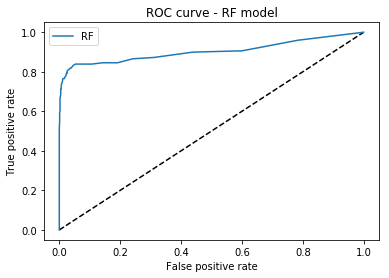

In [40]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [41]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9031735266050995

#### part 3.4.1: ROC of LR Model 

In [42]:
# Use predict_proba to get the probability results of logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test , y_pred_lr)

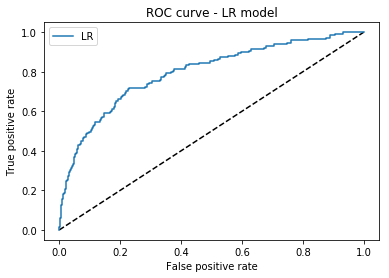

In [45]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()

In [46]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7949983832680069

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

In [48]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.1)
LRmodel_l1.fit(X_l1, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
number_customer_service_calls: 0.6379
intl_plan: 0.5866
voice_mail_plan: -0.4333
total_day_charge: 0.4182
total_eve_minutes: 0.291
total_day_minutes: 0.2736
total_intl_charge: 0.1547
total_intl_calls: -0.147
total_night_charge: 0.1307
total_intl_minutes: 0.0592
total_night_minutes: 0.0428
account_length: 0.0352
total_eve_charge: 0.0325
total_day_calls: 0.0301
total_night_calls: -0.011
total_eve_calls: -0.0091
number_vmail_messages: 0.0


In [49]:
# add L2 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))
  

Logistic Regression (L2) Coefficients
number_customer_service_calls: 0.6404
voice_mail_plan: -0.5974
intl_plan: 0.5895
total_day_minutes: 0.3502
total_day_charge: 0.3495
total_eve_charge: 0.1701
total_eve_minutes: 0.1699
total_intl_calls: -0.1653
number_vmail_messages: 0.1619
total_intl_charge: 0.1161
total_intl_minutes: 0.1156
total_night_minutes: 0.0962
total_night_charge: 0.0956
account_length: 0.0533
total_day_calls: 0.0483
total_night_calls: -0.0302
total_eve_calls: -0.0289


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [50]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1845
total_day_charge: 0.118
number_customer_service_calls: 0.1108
intl_plan: 0.0794
total_eve_minutes: 0.0724
total_intl_calls: 0.0624
total_eve_charge: 0.0587
total_intl_charge: 0.0422
total_night_charge: 0.0408
total_night_minutes: 0.0404
total_intl_minutes: 0.0384
total_night_calls: 0.0304
account_length: 0.0292
number_vmail_messages: 0.0288
total_eve_calls: 0.028
total_day_calls: 0.0269
voice_mail_plan: 0.0087
